In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read the datas: 
coffee_import = pd.read_csv('coffee/Coffee_import.csv')
coffee_green_inventorie = pd.read_csv('coffee/Coffee_green_coffee_inventorie.csv')
coffee_importers_consumption = pd.read_csv('coffee/Coffee_importers_consumption.csv')
coffee_re_export = pd.read_csv('coffee/Coffee_re_export.csv')
coffee_production = pd.read_csv('coffee/Coffee_production.csv')
coffee_export = pd.read_csv('coffee/Coffee_export.csv')
coffee_domestic_consumption = pd.read_csv('coffee/Coffee_domestic_consumption.csv')

In [7]:
coffee_import.sample(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
18,Luxembourg,0,0,0,0,0,0,0,0,0,...,19560000,19380000,22680000,24780000,22560000,23640000,22800000,25980000,24120000,415620000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000


In [8]:
coffee_green_inventorie.sample(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_inventorie
7,Italy,12900000,11340000,11220000,13680000,13320000,13020000,13380000,13620000,14040000,...,19740000,20760000,21120000,22260000,22200000,24180000,23760000,25260000,25680000,523440000
15,United Kingdom,11340000,10080000,10200000,12240000,12780000,11220000,7920000,6600000,7680000,...,2460000,2460000,2340000,2400000,2580000,1560000,1200000,1860000,2160000,186120000


In [9]:
coffee_importers_consumption.sample(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import_consumption
34,United States of America,1097880000,1119660000,1097400000,1153020000,1039560000,1041780000,1083540000,1067700000,1116240000,...,1322640000,1333920000,1405020000,1426020000,1466280000,1514580000,1570980000,1590840000,1638600000,37816800000
18,Luxembourg,0,0,0,0,0,0,0,0,0,...,12900000,12720000,14460000,15300000,13320000,13380000,12660000,15360000,13440000,263040000


In [10]:
coffee_production.sample(2)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
7,Malawi,Arabica,6300000.0,7440000.0,8220000.0,3720000.0,5040000.0,5460000.0,2940000.0,3660000.0,...,1560000.0,1380000.0,1680000.0,1500000.0,1260000.0,1200000.0,840000.0,780000.0,960000.0,82260000.0
44,Nigeria,Robusta,1740000.0,2640000.0,2940000.0,2700000.0,3120000.0,3180000.0,2760000.0,2700000.0,...,2820000.0,2460000.0,2460000.0,2580000.0,2460000.0,2580000.0,2520000.0,2520000.0,2520000.0,81900000.0


In [11]:
coffee_export.sample(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
39,Peru,66300000,62520000,63660000,46500000,63420000,105600000,100740000,98880000,116940000,...,281820000,258600000,224160000,163200000,167400000,237600000,236760000,243840000,226320000,4903920000
21,Guyana,0,0,60000,0,0,0,0,0,0,...,60000,120000,60000,780000,120000,120000,60000,60000,60000,2400000


In [14]:
coffee_domestic_consumption.sample(2)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
21,Cameroon,Robusta/Arabica,4998000,4999980,4999980,6000000,6000000,6000000,6000000,6000000,...,4201020,4303980,4408980,4519020,4560000,4620000,4680000,4680000,4620000,143450940


In [15]:
#  Main Country of export coffee: 
top_export = coffee_export[['Country', 'Total_export']].sort_values(by=['Total_export'], ascending=False).head(10)

# Main Country of import coffee:  
top_import = coffee_import[['Country', 'Total_import']].sort_values(by=['Total_import'], ascending=False).head(10)

# Main Country domestic consumption:
top_consum = coffee_domestic_consumption[['Country', 'Total_domestic_consumption']]
top_consum = top_consum.sort_values(by=['Total_domestic_consumption'], ascending=False).head(10)

# Main producters: 
top_prod = coffee_production[['Country', 'Total_production']].sort_values(by='Total_production', ascending=False).head(10)


Text(0.5, 1.0, 'Main Importers')

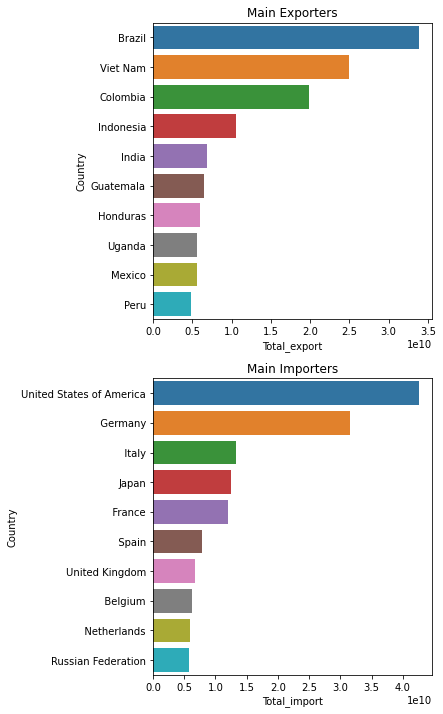

In [16]:
# Plot main exports and importers
f, axs = plt.subplots(2, 1, figsize = (5,12))

sns.barplot(data = top_export, x='Total_export', y='Country', ax = axs[0])
sns.barplot(data = top_import, x='Total_import', y='Country', ax = axs[1])

axs[0].set_title('Main Exporters')
axs[1].set_title('Main Importers')

Text(0.5, 1.0, 'Main producters')

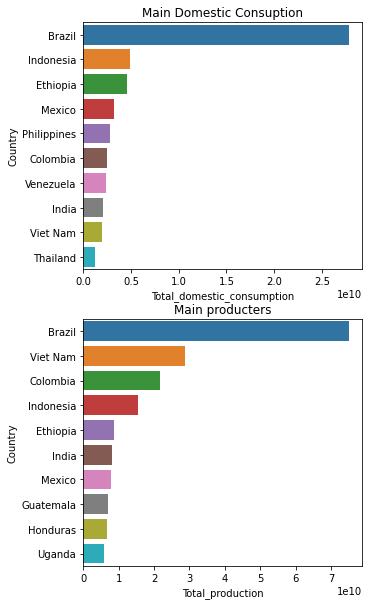

In [17]:
# Plot main Consumers and Producters
f, axs = plt.subplots(2, 1, figsize = (5,10))

sns.barplot(data = top_consum, x='Total_domestic_consumption', y='Country', ax = axs[0])
sns.barplot(data = top_prod, x='Total_production', y='Country', ax = axs[1])

axs[0].set_title('Main Domestic Consuption')
axs[1].set_title('Main producters')

## Evaluation of the main Countries per year

In [18]:
top_export['Country']

2        Brazil
51     Viet Nam
6      Colombia
25    Indonesia
24        India
19    Guatemala
23     Honduras
49       Uganda
32       Mexico
39         Peru
Name: Country, dtype: object

In [19]:
# Create a new dataframe for plot the graph:
top_production = coffee_export[coffee_export.Country.isin(top_export['Country'].unique())]
top_production = top_production.T
top_production.drop(['Country', 'Total_export'], axis=0, inplace=True)
top_production.columns = top_export['Country'].values
top_production.index.name = 'Year'
top_production.head()

,Brazil,Viet Nam,Colombia,Indonesia,India,Guatemala,Honduras,Uganda,Mexico,Peru
Year,,,,,,,,,,
1990,1016160000,836640000,194400000,104100000,118740000,414180000,220980000,66300000,141180000,68700000
1991,1270980000,755940000,169920000,86640000,103620000,370260000,211860000,62520000,125700000,72060000
1992,1127460000,993840000,199680000,117600000,108960000,276240000,199920000,63660000,117660000,116280000
1993,1070280000,814080000,225060000,102300000,126120000,339720000,195840000,46500000,109740000,124320000
1994,1036380000,706080000,196440000,103080000,149760000,276300000,167340000,63420000,202140000,163260000


**In the column "Brazil" has some negative values, in this case, I'll consider the absolute values for ploting the line graph of evaluate quantity coffee export per year.**

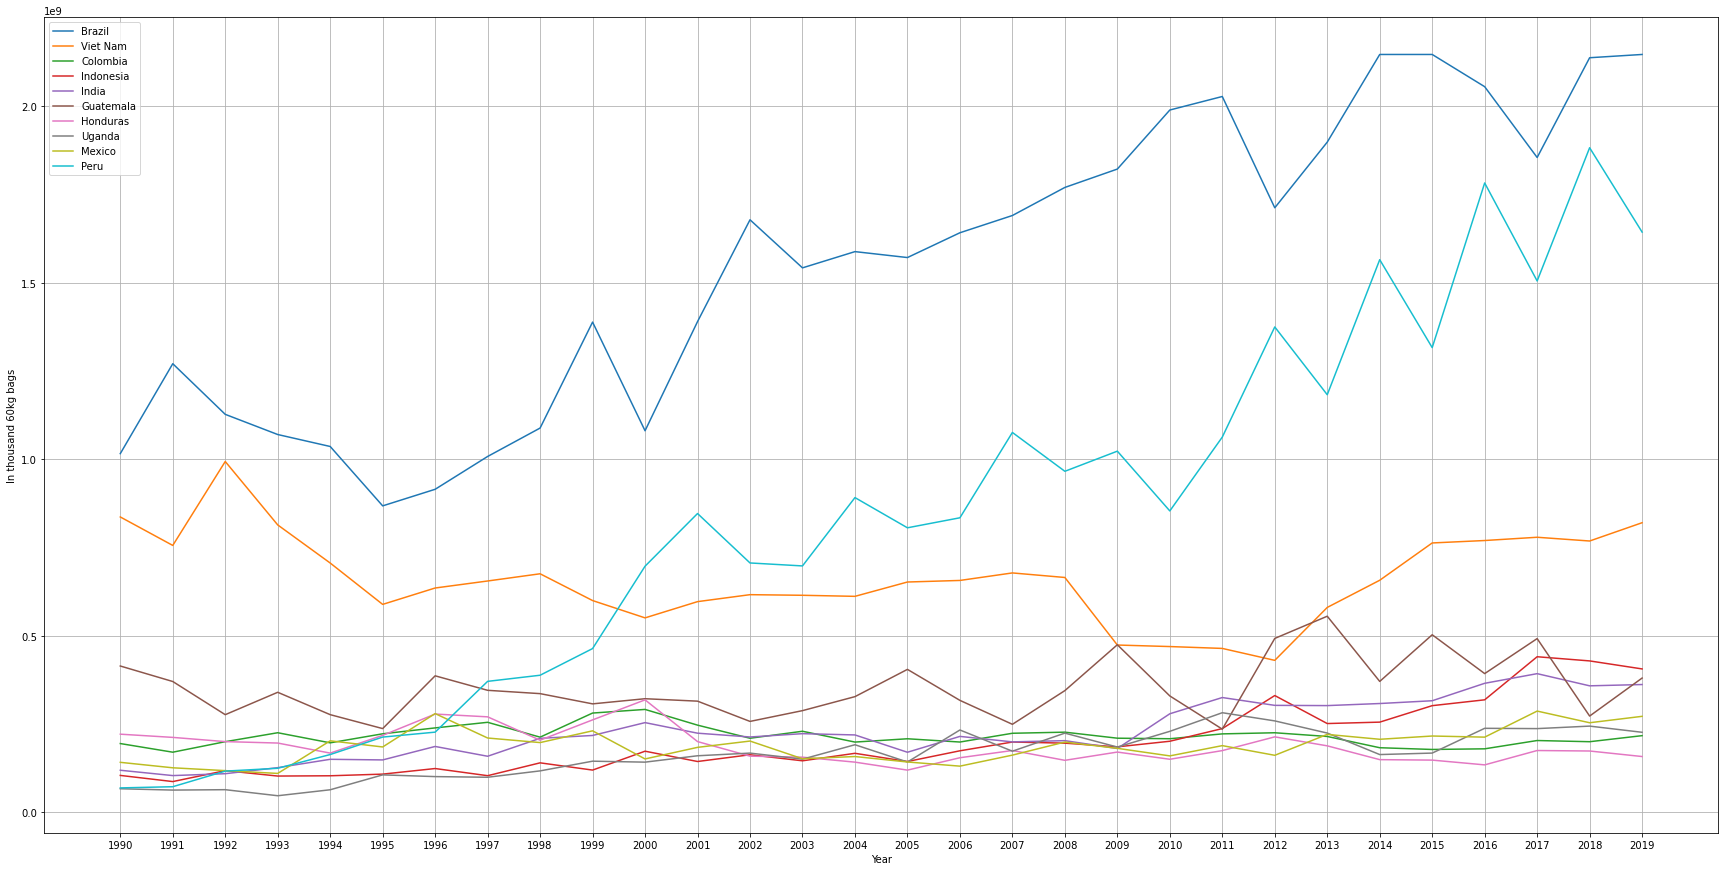

In [20]:
# Convert the value Brazil to absolute
top_production['Brazil'] = abs(top_production['Brazil'])
top_production

# Plotline Year versus Values:
plt.figure(figsize = (30,15))

for country in top_production.columns.values:
    sns.lineplot(data= top_production, x='Year', y=country, label=country)

plt.ylabel('In thousand 60kg bags')
plt.grid('on')